# Ford GoBike System Data
## by Mário Damhur

## Preliminary Wrangling

- This data set includes information about individual trips made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sb
from io import BytesIO
from zipfile import ZipFile
import os

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,8)
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# Gather

In [2]:
# Create directory for the dataset
directory = 'ford-gobike-dataset'

if not os.path.exists(directory):
    os.makedirs(directory)

In [3]:
# Donwload all the data files and unzip the them
urls = ['https://s3.amazonaws.com/fordgobike-data/201801-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201802-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201803-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201804-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201805-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201806-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201807-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201808-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201809-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201810-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201811-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201812-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201901-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201902-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/fordgobike-data/201903-fordgobike-tripdata.csv.zip']

for url in urls:
    response = requests.get(url)
    zip_file = ZipFile(BytesIO(response.content))
    zip_file.extractall(directory)

In [4]:
# Read all files except one and append into a list
list_dfs = []

for file in sorted(os.listdir(directory)):
    print('Append file:', file)
    list_dfs.append(pd.read_csv(directory + '/' + file))

Append file: 201801-fordgobike-tripdata.csv
Append file: 201802-fordgobike-tripdata.csv
Append file: 201803-fordgobike-tripdata.csv
Append file: 201804-fordgobike-tripdata.csv
Append file: 201805-fordgobike-tripdata.csv
Append file: 201806-fordgobike-tripdata.csv
Append file: 201807-fordgobike-tripdata.csv
Append file: 201808-fordgobike-tripdata.csv
Append file: 201809-fordgobike-tripdata.csv
Append file: 201810-fordgobike-tripdata.csv
Append file: 201811-fordgobike-tripdata.csv
Append file: 201812-fordgobike-tripdata.csv
Append file: 201901-fordgobike-tripdata.csv
Append file: 201902-fordgobike-tripdata.csv
Append file: 201903-fordgobike-tripdata.csv


In [5]:
# Concatenate all files into a single dataframe
df = pd.concat(list_dfs, sort=False)
print('Shape df:', df.shape)

Shape df: (2495514, 16)


In [6]:
# Saving the combined dataframe into a new file to work with
df.to_csv("ford-gobike-dataset/bikes_dataset_combined.csv", index = False)

# Assess

## Visual Assessment

In [7]:
bikes_df = pd.read_csv('ford-gobike-dataset/bikes_dataset_combined.csv')
print(bikes_df.shape)

(2495514, 16)


In [8]:
bikes_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495509,451,2019-03-01 00:06:16.6170,2019-03-01 00:13:47.9220,78.0,Folsom St at 9th St,37.773717,-122.411647,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,5410,Subscriber,1992.0,Male,No
2495510,390,2019-03-01 00:05:19.7830,2019-03-01 00:11:50.7710,75.0,Market St at Franklin St,37.773793,-122.421239,78.0,Folsom St at 9th St,37.773717,-122.411647,6286,Subscriber,1974.0,Male,Yes
2495511,231,2019-03-01 00:04:06.7990,2019-03-01 00:07:58.3140,317.0,San Salvador St at 9th St,37.333955,-121.877349,310.0,San Fernando St at 4th St,37.335885,-121.885660,6198,Subscriber,1994.0,Male,Yes
2495512,257,2019-03-01 00:00:20.6750,2019-03-01 00:04:38.0380,235.0,Union St at 10th St,37.807239,-122.289370,160.0,West Oakland BART Station,37.805318,-122.294837,5096,Subscriber,1990.0,Other,Yes


In [9]:
bikes_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1579814,134,2018-10-03 14:20:24.2250,2018-10-03 14:22:38.7870,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,159.0,24th St at Market St,37.816060,-122.278244,1415,Subscriber,1975.0,Male,Yes
93721,86,2018-01-01 17:44:42.9040,2018-01-01 17:46:09.8590,24.0,Spear St at Folsom St,37.789677,-122.390428,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,1111,Subscriber,1977.0,Male,No
1369693,794,2018-09-06 09:39:51.9140,2018-09-06 09:53:06.2690,NaN,NaN,37.410000,-121.940000,NaN,NaN,37.390000,-121.930000,4263,Subscriber,1992.0,Male,No
2420194,814,2019-03-11 18:49:43.0600,2019-03-11 19:03:18.0130,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,58.0,Market St at 10th St,37.776619,-122.417385,5933,Subscriber,1997.0,Male,No
2294147,584,2019-03-25 17:56:03.8730,2019-03-25 18:05:47.9610,97.0,14th St at Mission St,37.768265,-122.420110,132.0,24th St at Chattanooga St,37.751819,-122.426614,6787,Subscriber,1992.0,Female,No
2172349,361,2019-02-12 07:42:38.5230,2019-02-12 07:48:39.5320,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,80.0,Townsend St at 5th St,37.775235,-122.397437,861,Subscriber,1994.0,Male,No
2413474,472,2019-03-12 14:20:47.6970,2019-03-12 14:28:40.2290,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,212.0,Mosswood Park,37.824893,-122.260437,4859,Subscriber,1990.0,Male,No
578133,715,2018-05-08 18:44:56.6920,2018-05-08 18:56:52.2920,114.0,Rhode Island St at 17th St,37.764478,-122.402570,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,4060,Subscriber,1985.0,Male,Yes
275040,230,2018-03-12 08:55:42.9910,2018-03-12 08:59:33.3260,200.0,2nd Ave at E 18th St,37.800214,-122.253810,201.0,10th St at Fallon St,37.797673,-122.262997,3281,Subscriber,1991.0,Male,No
510862,7176,2018-05-20 09:09:15.1020,2018-05-20 11:08:51.5320,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,4223,Subscriber,1982.0,Male,No


## Programmatic assessment

In [10]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495514 entries, 0 to 2495513
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 304.6+ MB


In [11]:
bikes_df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12437
start_station_name          12437
start_station_latitude          0
start_station_longitude         0
end_station_id              12437
end_station_name            12437
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          140426
member_gender              140072
bike_share_for_all_trip         0
dtype: int64

In [12]:
bikes_df.duplicated().sum()

0

In [13]:
bikes_df.member_birth_year.value_counts()

1988.0    137891
1989.0    116568
1987.0    115247
1990.0    112204
1993.0    109232
           ...  
1878.0         3
1930.0         2
1906.0         2
1903.0         1
1910.0         1
Name: member_birth_year, Length: 90, dtype: int64

In [14]:
bikes_df[bikes_df.member_birth_year < 1919]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
93,465,2018-01-31 21:56:17.6330,2018-01-31 22:04:02.8280,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,60.0,8th St at Ringold St,37.774520,-122.409449,1168,Subscriber,1911.0,Other,No
1065,549,2018-01-31 18:01:24.7290,2018-01-31 18:10:34.2680,78.0,Folsom St at 9th St,37.773717,-122.411647,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2920,Subscriber,1911.0,Other,No
1254,568,2018-01-31 17:40:47.7010,2018-01-31 17:50:16.5020,223.0,16th St Mission BART Station 2,37.764765,-122.420091,60.0,8th St at Ringold St,37.774520,-122.409449,3363,Subscriber,1911.0,Other,No
1532,658,2018-01-31 17:11:03.4240,2018-01-31 17:22:01.9530,19.0,Post St at Kearny St,37.788975,-122.403452,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2992,Subscriber,1902.0,Male,No
2983,1681,2018-01-31 09:37:00.0450,2018-01-31 10:05:01.8970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,98.0,Valencia St at 16th St,37.765052,-122.421866,3447,Subscriber,1911.0,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483105,699,2019-03-03 07:36:48.5980,2019-03-03 07:48:28.5700,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5479,Subscriber,1901.0,Male,No
2484434,441,2019-03-02 17:50:01.2370,2019-03-02 17:57:22.8480,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,176.0,MacArthur BART Station,37.828410,-122.266315,588,Subscriber,1900.0,Male,Yes
2489898,1430,2019-03-01 16:31:42.8830,2019-03-01 16:55:33.4370,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5032,Subscriber,1900.0,Male,No
2490339,157,2019-03-01 16:17:56.8800,2019-03-01 16:20:34.7530,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,417,Subscriber,1900.0,Male,Yes


**Quality**
* Wrong datatypes assigned to start_time, end_time
* Inconsistent values in member_birth_year

**Tidiness**
- No tidiness issues. In my opinion the data is ok, just some feature engineering to be made.

**Possible Feature Engineering**
- New column age_range
- New column month_year

# Clean

In [40]:
bikes_df_clean = bikes_df.copy()

**Wrong datatypes: start_time, end_time**

#### Define
Change the datatypes with pandas function

In [41]:
bikes_df_clean['start_time'] = pd.to_datetime(bikes_df_clean['start_time'])
bikes_df_clean['end_time'] = pd.to_datetime(bikes_df_clean['end_time'])

#### Test

In [42]:
bikes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495514 entries, 0 to 2495513
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 304.

**Incosisntet values in member_age_year**

#### Define
Will be considered only ages greater or equal than 1919 anges ages lower than 1900 can be considered as a typing error, we can replace the digit of hundred 8 to 9 (1889 -> 1989)

In [43]:
print('Values < 1900:', (bikes_df_clean.member_birth_year < 1900).sum())
print('Rows before:', bikes_df_clean.shape[0])
bikes_df_clean['member_birth_year'] = bikes_df_clean.member_birth_year.apply(lambda x: int('19'+str(int(x))[-2:]) if x < 1900 else x)
bikes_df_clean = bikes_df_clean[bikes_df_clean.member_birth_year >= 1919]

Values < 1900: 45
Rows before: 2495514


#### Test

In [44]:
print('Rows after:', bikes_df_clean.shape[0])
bikes_df_clean[bikes_df_clean.member_birth_year < 1919]

Rows after: 2353696


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


**New column age_groups and change the datatype**

#### Define
Associate the age of the member with the member_birth_year column and create age ranges. Then, change the datatype to categorical in order.

In [45]:
bikes_df_clean['age'] = 2019 - bikes_df_clean.member_birth_year

min_age_limit = np.int(np.floor(np.min(bikes_df_clean['age'])/10)*10)
max_age_limit = np.int(np.ceil(np.max(bikes_df_clean['age'])/10)*10)

bikes_df_clean['age_range'] = pd.cut(bikes_df_clean['age'], (range(min_age_limit,max_age_limit + 10, 10)), right=False).astype('str')

bikes_df_clean = bikes_df_clean.drop(columns=['age'])

bikes_df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_range
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,"[30, 40)"
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,"[20, 30)"
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,"[20, 30)"
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No,"[30, 40)"
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No,"[30, 40)"


#### Test

In [46]:
bikes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353696 entries, 0 to 2495513
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
 16  age_range                object        
dtypes: datetime64[ns](2), float

In [47]:
bikes_df_clean.age_range.value_counts()

[30, 40)     967219
[20, 30)     731072
[40, 50)     381178
[50, 60)     197112
[60, 70)      56110
[10, 20)      10961
[70, 80)       8273
[80, 90)       1489
[90, 100)       282
Name: age_range, dtype: int64

**New column month_year**

#### Define
Create the new column from date start_time column

In [48]:
# Thanks to https://stackoverflow.com/a/43896119
bikes_df_clean['month_year'] = bikes_df_clean['start_time'].dt.to_period('M')

#### Test

In [49]:
bikes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353696 entries, 0 to 2495513
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
 16  age_range                object        
 17  month_year               pe

In [50]:
bikes_df_clean.month_year.value_counts()

2019-03    244471
2018-10    192736
2018-07    186721
2018-06    183262
2019-01    182275
2018-08    181150
2018-09    176189
2019-02    175076
2018-05    167270
2018-11    128991
2018-12    126287
2018-04    121677
2018-03    102246
2018-02     98498
2018-01     86847
Freq: M, Name: month_year, dtype: int64

**Remove unnecessary columns**

#### Define
Remove the columns: 'start_station_id', 'end_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'

In [51]:
bikes_df_clean = bikes_df_clean.drop(columns=['start_station_id', 'end_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1)

#### Test

In [52]:
bikes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353696 entries, 0 to 2495513
Data columns (total 12 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_name       object        
 4   end_station_name         object        
 5   bike_id                  int64         
 6   user_type                object        
 7   member_birth_year        float64       
 8   member_gender            object        
 9   bike_share_for_all_trip  object        
 10  age_range                object        
 11  month_year               period[M]     
dtypes: datetime64[ns](2), float64(1), int64(2), object(6), period[M](1)
memory usage: 233.4+ MB


# Saving the clean dataset

In [28]:
bikes_df_clean.to_csv('ford-gobike-dataset/ford_gobike_cleaned.csv', index=False)

In [29]:
master_df = pd.read_csv('ford-gobike-dataset/ford_gobike_cleaned.csv')
master_df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_range,month_year
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,1986.0,Male,No,"[30, 40)",2018-01
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,Jackson St at 5th St,5th St at Virginia St,3039,Customer,1996.0,Male,No,"[20, 30)",2018-01
2,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,1991.0,Male,No,"[20, 30)",2018-01
3,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,17th & Folsom Street Park (17th St at Folsom St),Valencia St at 24th St,3571,Subscriber,1988.0,Male,No,"[30, 40)",2018-01
4,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,Berry St at 4th St,4th St at Mission Bay Blvd S,1403,Subscriber,1980.0,Male,No,"[30, 40)",2018-01


In [30]:
master_df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_name         12103
end_station_name           12103
bike_id                        0
user_type                      0
member_birth_year              0
member_gender                  0
bike_share_for_all_trip        0
age_range                      0
month_year                     0
dtype: int64

<!-- ### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here! -->

## Univariate Exploration

- ### **duration_sec, month_year**

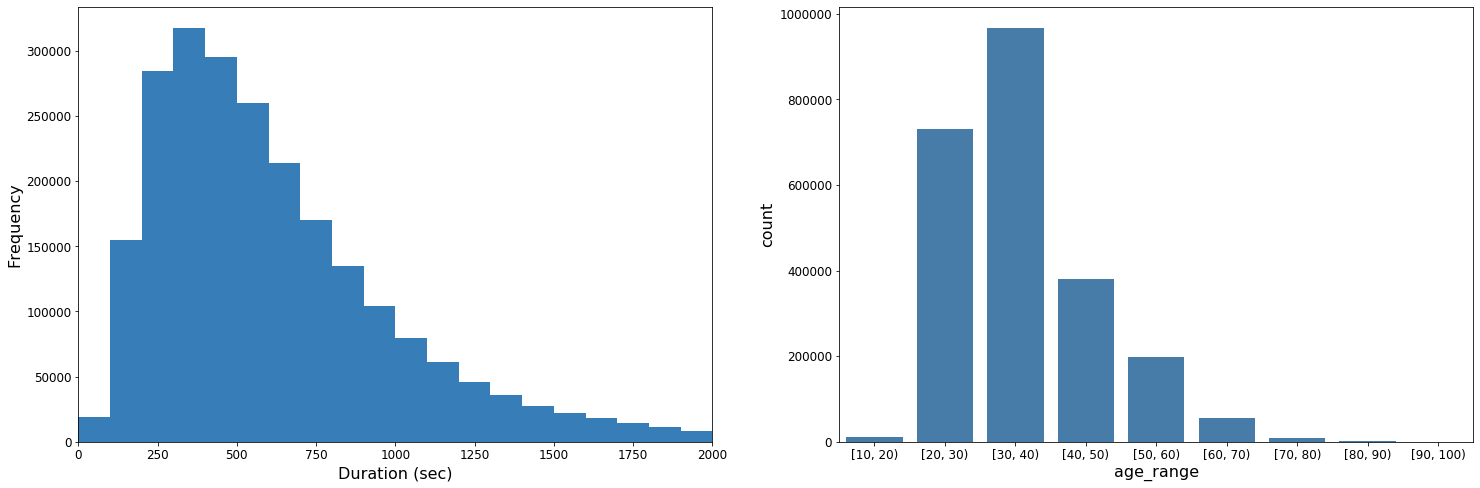

In [53]:
#Thanks to https://gist.github.com/thriveth/8560036
color_friendly = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

classes = sorted(master_df.age_range.unique())
age_order = pd.api.types.CategoricalDtype(categories=classes, ordered=True)
master_df['age_range'] = master_df['age_range'].astype(age_order)


bins_edge = np.arange(0, master_df.duration_sec.max()+100, 100)

#base_color = sb.color_palette()[0]
plt.figure(figsize=(25, 8))

plt.subplot(1,2,1)
plt.hist(data=master_df, x='duration_sec', bins=bins_edge, color='#377eb8')
plt.xlim(0, 2000)
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sb.countplot(master_df['age_range'], color='#377eb8');

- We can observe that this distribution is highly skewed to right. Most of the trips have the duration between 300 to 600 seconds, that is, 5 to 10 minutes.
- Most of the users have the age between 30-40, followed by 20-30, 40-50 and so on.

- ### **user_type, member_gender**

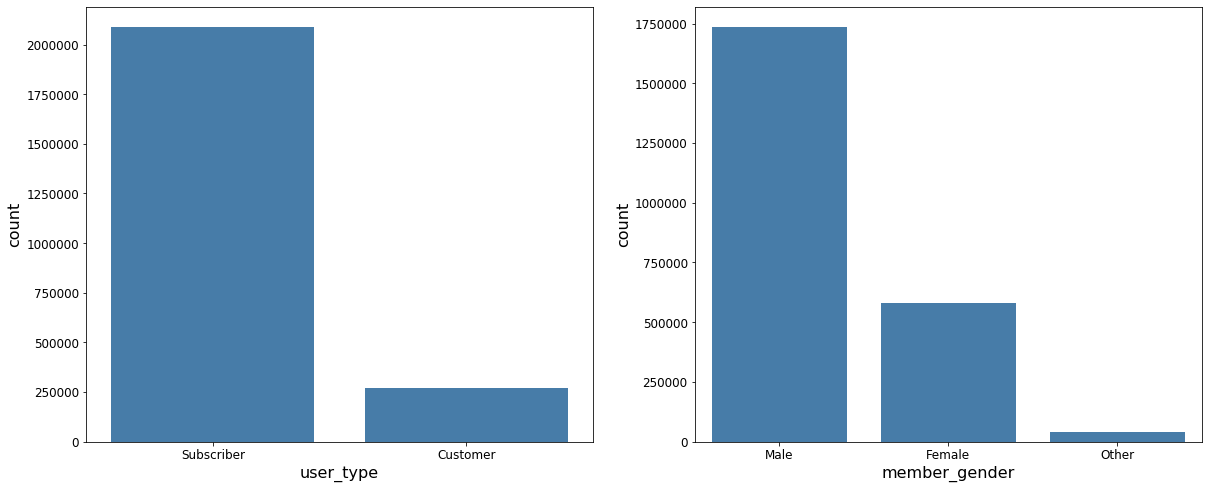

In [32]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sb.countplot(master_df['user_type'], color='#377eb8')

plt.subplot(1,2,2)
sb.countplot(master_df['member_gender'], color='#377eb8');

- There are much more subscriber than customer.
- There are much more male than the others genders.

<!-- ### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- No, I didn't have to. I just specified the range of my x variable because that are some trips with a pretty high duration.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I didn't perform any operation. -->

## Bivariate Exploration

- ### **member_gender x user_type**
- ### **member_gender x duration_sec**

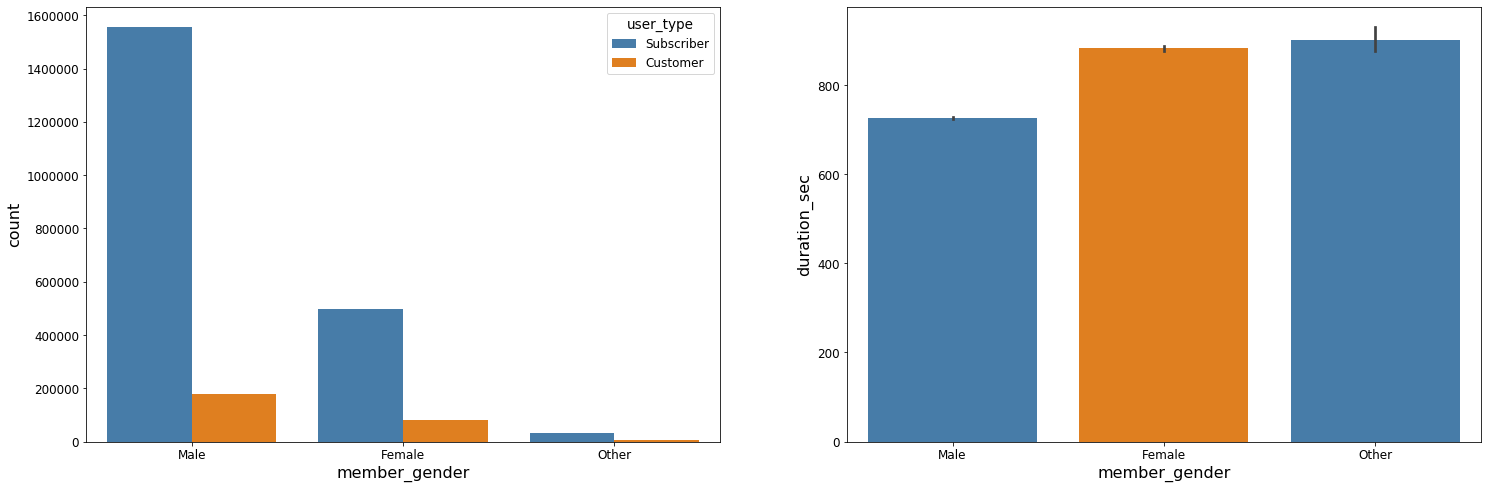

In [33]:
plt.figure(figsize=(25, 8))

plt.subplot(1,2,1)
sb.countplot(data=master_df, x='member_gender', hue='user_type', palette=['#377eb8', '#ff7f00'])

plt.subplot(1,2,2)
sb.barplot(data=master_df, x='member_gender', y='duration_sec', palette=['#377eb8', '#ff7f00']);

- The number of subscriber is much more than that of the customer. The male subscriber shows a very huge proportion of the total sample.
- We can observe that duration of the trips in each gender are very different. In average, the duration of the trips in the male gender are lower in terms of seconds (about 730 sec, that is, 14 minutes aproximattely). In contrast, female gender use the trips for more time (about 875 sec, that is, 15 minutes aproximattely). Finally, others genders are about (875-925 sec, that is, 15-16 minutes). 

- ### **month_year x duration_sec**

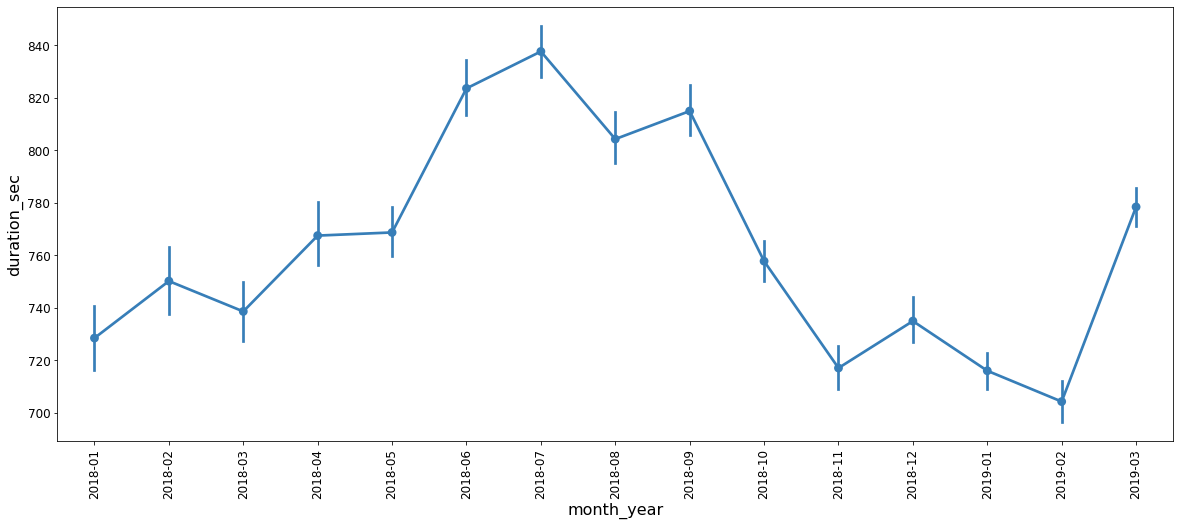

In [34]:
plt.figure(figsize=(20, 8))

sb.pointplot(data=master_df, x='month_year', y='duration_sec', color='#377eb8')
plt.xticks(rotation=90);

- The months who have more duration in the trips are June, July (Highest), August and September.
- The months who have lower duration is the trips is November, December, January and Frebruary (Lowest).

- ### **duration_sec x start_station_name (Top 3)**

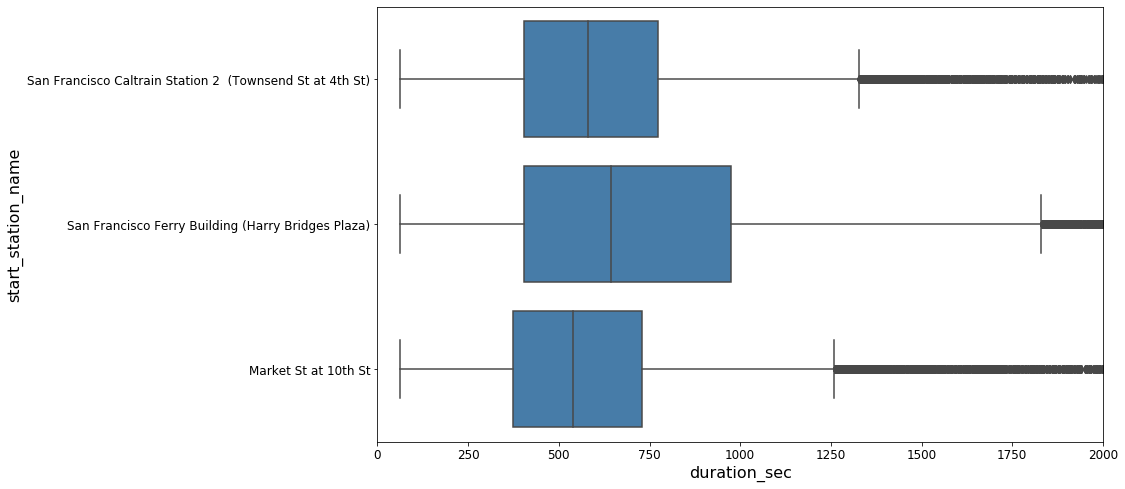

In [35]:
# Top 3 stations
top_3_stations = master_df['start_station_name'].value_counts().index[:3]
master_df_top_3_stations = master_df.loc[master_df['start_station_name'].isin(top_3_stations)]

plt.figure(figsize = [13, 8])

sb.boxplot(data = master_df_top_3_stations, y = 'start_station_name', x = 'duration_sec', color = '#377eb8', orient="h")
plt.xlim(0, 2000);

- Here we can observe the top 3 stations that users use to start a trip. We can observe the users who start in the  station San Francisco Ferry Building (Harry Bridges Plaza) have more duration in the trip, the median of duration is about 650 seconds, that is, about 11 minutes and the Q3 quartile is pretty higher. The other both stations have basically the same results, the median is about 530 seconds, that is, about 9 minutes.

<!-- ### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here! -->

## Multivariate Exploration

- ### **duration_sec X month_year X user_type**
- ### **duration_sec X month_year X member_gender**

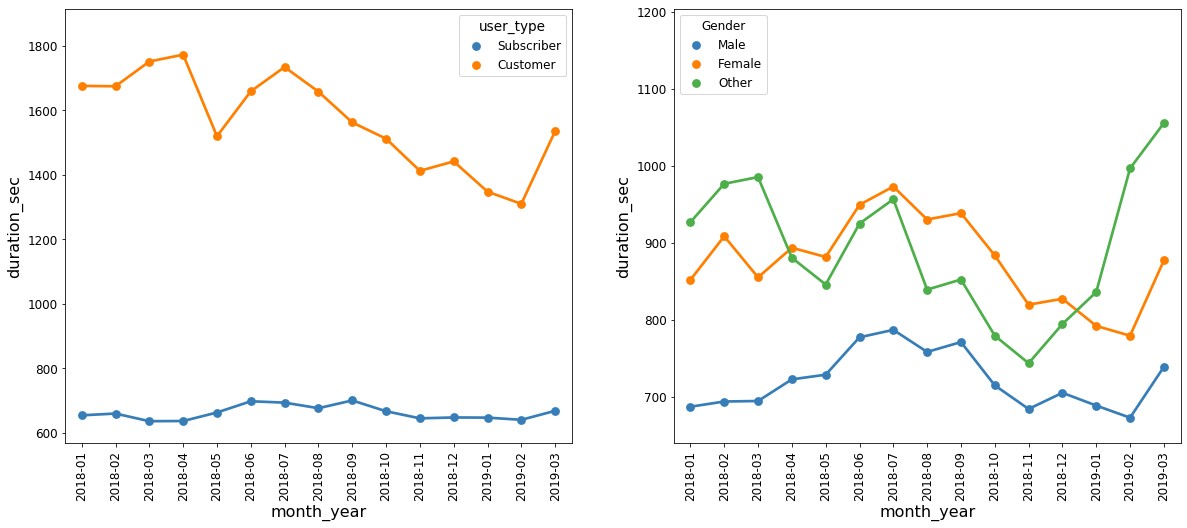

In [36]:
plt.figure(figsize=[20, 8])

plt.subplot(1, 2, 1)
sb.pointplot(data=master_df, x='month_year', y='duration_sec', hue='user_type', palette=['#377eb8', '#ff7f00'], errwidth=0)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sb.pointplot(data=master_df, x='month_year', y='duration_sec', hue='member_gender', palette=['#377eb8', '#ff7f00', '#4daf4a'], errwidth=0)
plt.xticks(rotation=90)
plt.legend(title='Gender', loc=2);

- Here we can observe the trend of each type of user. Customers have more duration in the trips compare to the subscribers, the difference of duration in each month is more than twice. We have more variance in duration in the customers than in the subscribers
- In the gender analysis, the variance is more higher in all types of genders but in all of than we observe pratically the same trend for each month. 

<!-- ### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here! -->

<!-- > At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report! -->

- ### **Faceting duration_sec X age_range X member_gender X user_type**

/home/damhur/miniconda3/envs/ml/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/damhur/miniconda3/envs/ml/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


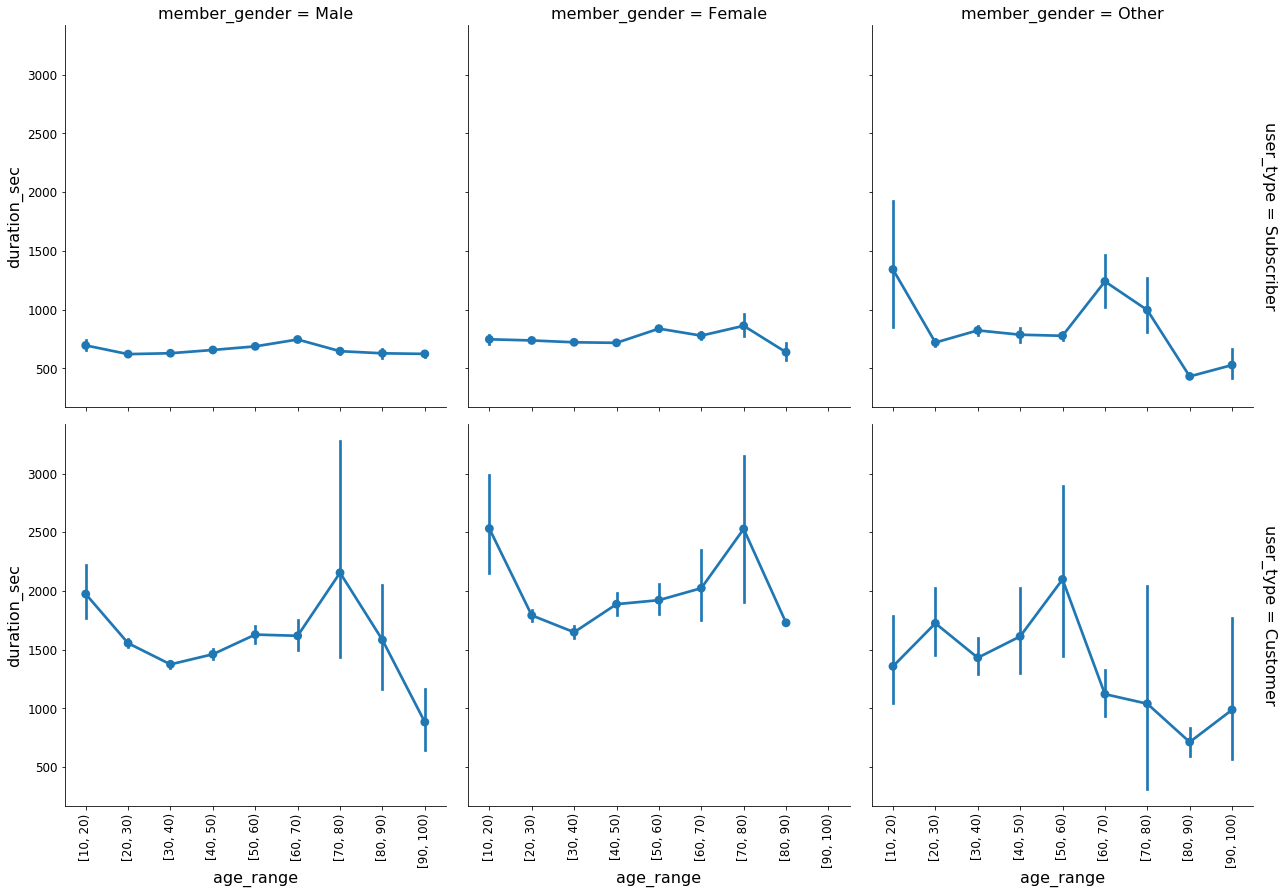

In [55]:
g = sb.FacetGrid(data = master_df, col = 'member_gender', row = 'user_type', size = 6,
                margin_titles = True)
g.map(sb.pointplot, 'age_range', 'duration_sec')
g.set_xticklabels(rotation=90);

- We can observe that are more variance in the duration for each age range on the customer type in all genders than the subscriber type, except the gender 'other' in the subscriber type.
- For customers, the age range of 70-80 in the male gender have more duration on the trips. For female gender, the age range of 10-20 and 70-80 have more duration. Finally, in the other gende we have the age range of 50-60 that have more duration trip.